In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'student-mental-health-survey:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F5585109%2F9233702%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240920%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240920T003821Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D6e9a009fd0e85d9e156d36c1716dde72dd80ef4c727393b6c37a22717d26fbf52d410807f444e737e48c7de94a77322a12e16dd9fdf5836c1f29b121e2171e6cdc24aaadb001161477683e4e886ffc410984f895070a0c35135b1f481aa67822b77ff0380095cb5ef8b22e8ca5fada1d7d499e0a2f5980ad8b86bef08c03c2a746faf0773700b4e06f4de656b603f47ae4fff64c534737fd5af38d0e6ebd794b246f5be8e004cc1a7a893f80189b3a73508c80a616ba47485c6a29190007aca10a29ad31ea3bc4371e313334f8d02678da7d0b358f47e0fa50a8fbc2803b085bbbf143a2a5da5323da558de3bd01422c3e813186fecba46cc12ffb50fa87870a'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 2030 bytes downloaded
Downloaded and uncompressed: student-mental-health-survey
Data source import complete.


### Project 1 Machine Learning. Dataset and Visualization

First, we have to get the path of the dataset.

In [2]:
import numpy as np
import pandas as pd
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/student-mental-health-survey/MentalHealthSurvey.csv


Then we have to read the dataset with the pandas library.

In [3]:
import pandas as pd

df = pd.read_csv('/kaggle/input/student-mental-health-survey/MentalHealthSurvey.csv')

### Size of the data set

We can see that in the csv we have, has 87 rows and 21 columns.

In [4]:
df.tail()

,gender,age,university,degree_level,degree_major,academic_year,cgpa,residential_status,campus_discrimination,sports_engagement,...,study_satisfaction,academic_workload,academic_pressure,financial_concerns,social_relationships,depression,anxiety,isolation,future_insecurity,stress_relief_activities
82,Male,22,PU,Undergraduate,Information Technology,4th year,3.0-3.5,On-Campus,No,No Sports,...,4,3,1,4,4,2,3,1,2,"Online Entertainment, Outdoor Activities, Sleep"
83,Female,22,COMSATS,Undergraduate,Software Engineering,4th year,3.5-4.0,Off-Campus,Yes,No Sports,...,5,5,5,5,1,5,5,5,5,"Religious Activities, Sleep"
84,Male,21,PU,Undergraduate,Data Science,2nd year,2.0-2.5,Off-Campus,No,No Sports,...,5,4,2,4,3,1,2,1,1,"Religious Activities, Sports and Fitness, Soci..."
85,Male,22,PU,Undergraduate,Data Science,2nd year,2.5-3.0,Off-Campus,No,No Sports,...,3,3,3,3,2,3,4,4,5,Sleep
86,Female,19,PU,Undergraduate,Data Science,2nd year,3.5-4.0,On-Campus,No,4-6 times,...,4,4,4,3,4,2,2,1,3,Sports and Fitness


### Data type

We can see in an explicit way the types of the columns in the dataset with the attribute dtypes.

In [5]:
df.dtypes

,0
gender,object
age,int64
university,object
degree_level,object
degree_major,object
academic_year,object
cgpa,object
residential_status,object
campus_discrimination,object
sports_engagement,object


The method head can be used to see the first five tuples of the dataset and see what the dataset is about and give us a better idea.

In [6]:
df.head()

,gender,age,university,degree_level,degree_major,academic_year,cgpa,residential_status,campus_discrimination,sports_engagement,...,study_satisfaction,academic_workload,academic_pressure,financial_concerns,social_relationships,depression,anxiety,isolation,future_insecurity,stress_relief_activities
0,Male,20,PU,Undergraduate,Data Science,2nd year,3.0-3.5,Off-Campus,No,No Sports,...,5,4,5,4,3,2,1,1,2,"Religious Activities, Social Connections, Onli..."
1,Male,20,UET,Postgraduate,Computer Science,3rd year,3.0-3.5,Off-Campus,No,1-3 times,...,5,4,4,1,3,3,3,3,4,Online Entertainment
2,Male,20,FAST,Undergraduate,Computer Science,3rd year,2.5-3.0,Off-Campus,No,1-3 times,...,5,5,5,3,4,2,3,3,1,"Religious Activities, Sports and Fitness, Onli..."
3,Male,20,UET,Undergraduate,Computer Science,3rd year,2.5-3.0,On-Campus,No,No Sports,...,3,5,4,4,1,5,5,5,3,Online Entertainment
4,Female,20,UET,Undergraduate,Computer Science,3rd year,3.0-3.5,Off-Campus,Yes,No Sports,...,3,5,5,2,3,5,5,4,4,Online Entertainment


The dataset has informations about students, like their gender, age, university, information about their degree, grades of some parameters, and some an array of stress relief actvities.

### Check Empty Data

We can check if we have empty values in the dataset.

In [7]:
has_empty_values = False
for row_idx in range(len(df)):
    for col_idx in range(len(df.columns)):
        if pd.isna(df.iat[row_idx, col_idx]):
            has_empty_values = True
            print(f"empty value in row {row_idx}, column '{df.columns[col_idx]}'")
if has_empty_values == False:
    print("The dataset does not contain empty values")

The dataset does not contain empty values


In [8]:
df.isnull().values.any()

False

In this case the dataset does not contain empty data

### Visualizations

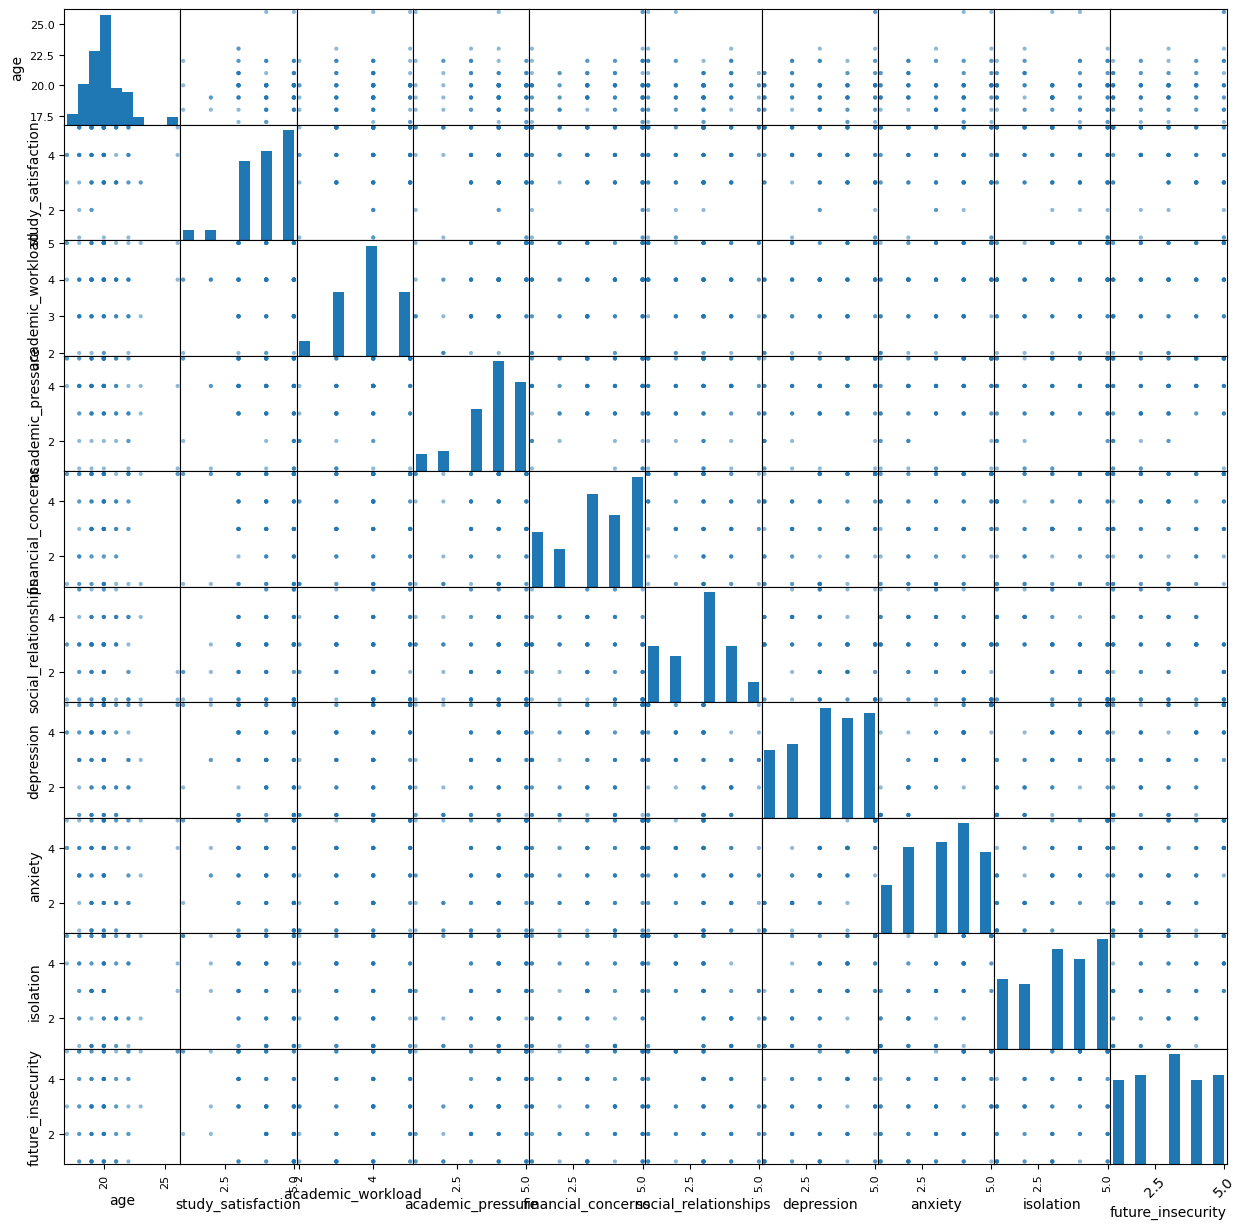

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# Filtrar solo las columnas numéricas
df_numeric = df.select_dtypes(include=[float, int])

# Crear la scatter matrix con un tamaño más grande
scatter_matrix(df_numeric, figsize=(15, 15))

# Ajustar el tamaño de las etiquetas de los ejes
plt.xticks(fontsize=10, rotation=45)  # Ajustar tamaño de fuente y rotación de etiquetas en el eje x
plt.yticks(fontsize=10)               # Ajustar tamaño de fuente en el eje y

plt.savefig("scatter_matrix.png", format='png', bbox_inches='tight')

# Mostrar el gráfico
plt.show()



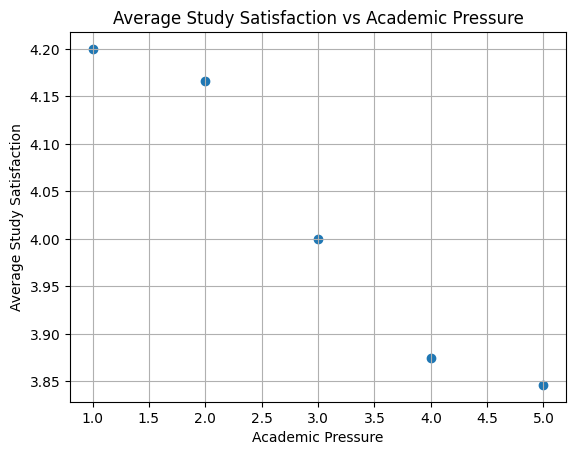

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

# Asumiendo que tu DataFrame ya está cargado como 'df'

# Agrupar por academic_pressure y calcular la media de study_satisfaction
grouped_data = df.groupby('academic_pressure')['study_satisfaction'].mean().reset_index()

# Graficar las medias con puntos
plt.scatter(grouped_data['academic_pressure'], grouped_data['study_satisfaction'])
plt.title('Average Study Satisfaction vs Academic Pressure')
plt.xlabel('Academic Pressure')
plt.ylabel('Average Study Satisfaction')
plt.grid(True)
plt.show()




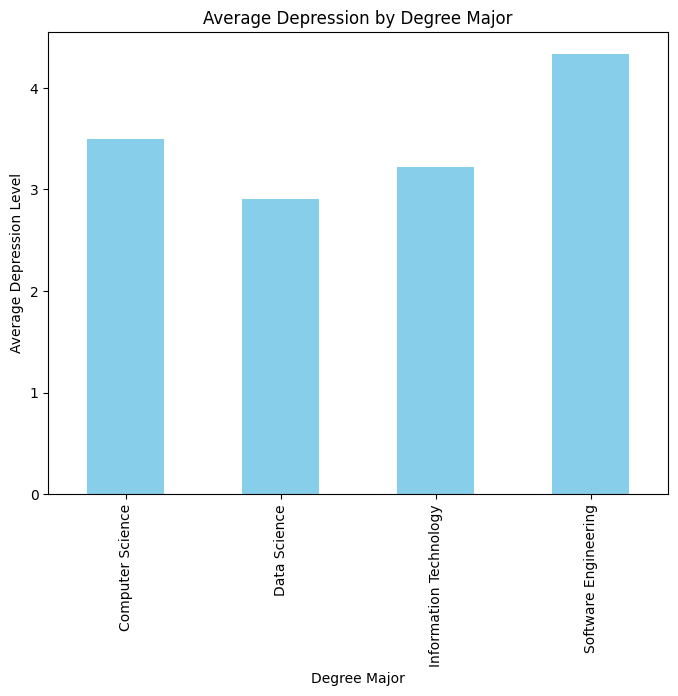

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

degree_major_col = 'degree_major'
depression_col = 'depression'

mean_depression_by_major = df.groupby(degree_major_col)[depression_col].mean()

plt.figure(figsize=(8,6))
mean_depression_by_major.plot(kind='bar', color='skyblue')

plt.title('Average Depression by Degree Major')
plt.xlabel('Degree Major')
plt.ylabel('Average Depression Level')

plt.show()
